In [1]:
import rasterio
import numpy as np
from rasterio.plot import show
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Load Environment

In [2]:
SAMPLE_SIZE = 10

In [3]:
file_path = "../../data/forest/fuel_type/FBP_fueltypes_Canada_30m_EPSG3978_20240522.tif"

In [4]:
color_label = [
    [-9999, (255, 255, 255, 255), ""],
    [1, (209, 255, 115, 255), "C-1 Spruce-Lichen Woodland (1)"],
    [2, (34, 102, 51, 255), "C-2 Boreal Spruce (2)"],
    [3, (131, 199, 149, 255), "C-3 Mature Jack or Lodgepole Pine (3)"],
    [4, (112, 168, 0, 255), "C-4 Immature Jack or Lodgepole Pine (4)"],
    [5, (223, 184, 230, 255), "C-5 Red and White Pine (5)"],
    [7, (112, 12, 242, 255), "C-7 Ponderosa Pine / Douglas Fir (7)"],
    [11, (196, 189, 151, 255), "D-1 Leafless Aspen (11)"],
    [13, (196, 189, 151, 255), "D-1/D-2 Aspen (13)"],
    [31, (255, 255, 190, 255), "O-1a Matted Grass (31)"],
    [101, (130, 130, 130, 255), "Non-fuel (101)"],
    [102, (115, 223, 255, 255), "Water"],
    [105, (204, 204, 204, 255), "Vegetated Non-Fuel (105)"],
    [415, (255, 211, 127, 255), "M-1 Boreal Mixedwood - Leafless (15% Conifer)"],
    [625, (255, 211, 127, 255), "M-1/M-2 Boreal Mixedwood (25% Conifer)"],
    [650, (255, 211, 127, 255), "M-1/M-2 Boreal Mixedwood (50% Conifer) (650)"],
    [675, (255, 211, 127, 255), "M-1/M-2 Boreal Mixedwood (75% Conifer)"],
]

# Convert RGBA values (0-255) to Matplotlib format (0-1)
color_dict = {entry[0]: np.array(entry[1]) / 255 for entry in color_label}
label_dict = {entry[0]: entry[2] for entry in color_label}

# Create colormap & normalizer
unique_values = list(color_dict.keys())
colors = [color_dict[val] for val in unique_values]
cmap = mcolors.ListedColormap(colors)
norm = mcolors.BoundaryNorm(unique_values + [max(unique_values) + 1], cmap.N)

In [5]:
with rasterio.open(file_path) as dataset:
    print(f"CRS: {dataset.crs}")

    # Read the image data
    image_data = dataset.read(1)
    del dataset
    print(f"original size: {image_data.shape}")


CRS: EPSG:3978
original size: (119099, 178399)


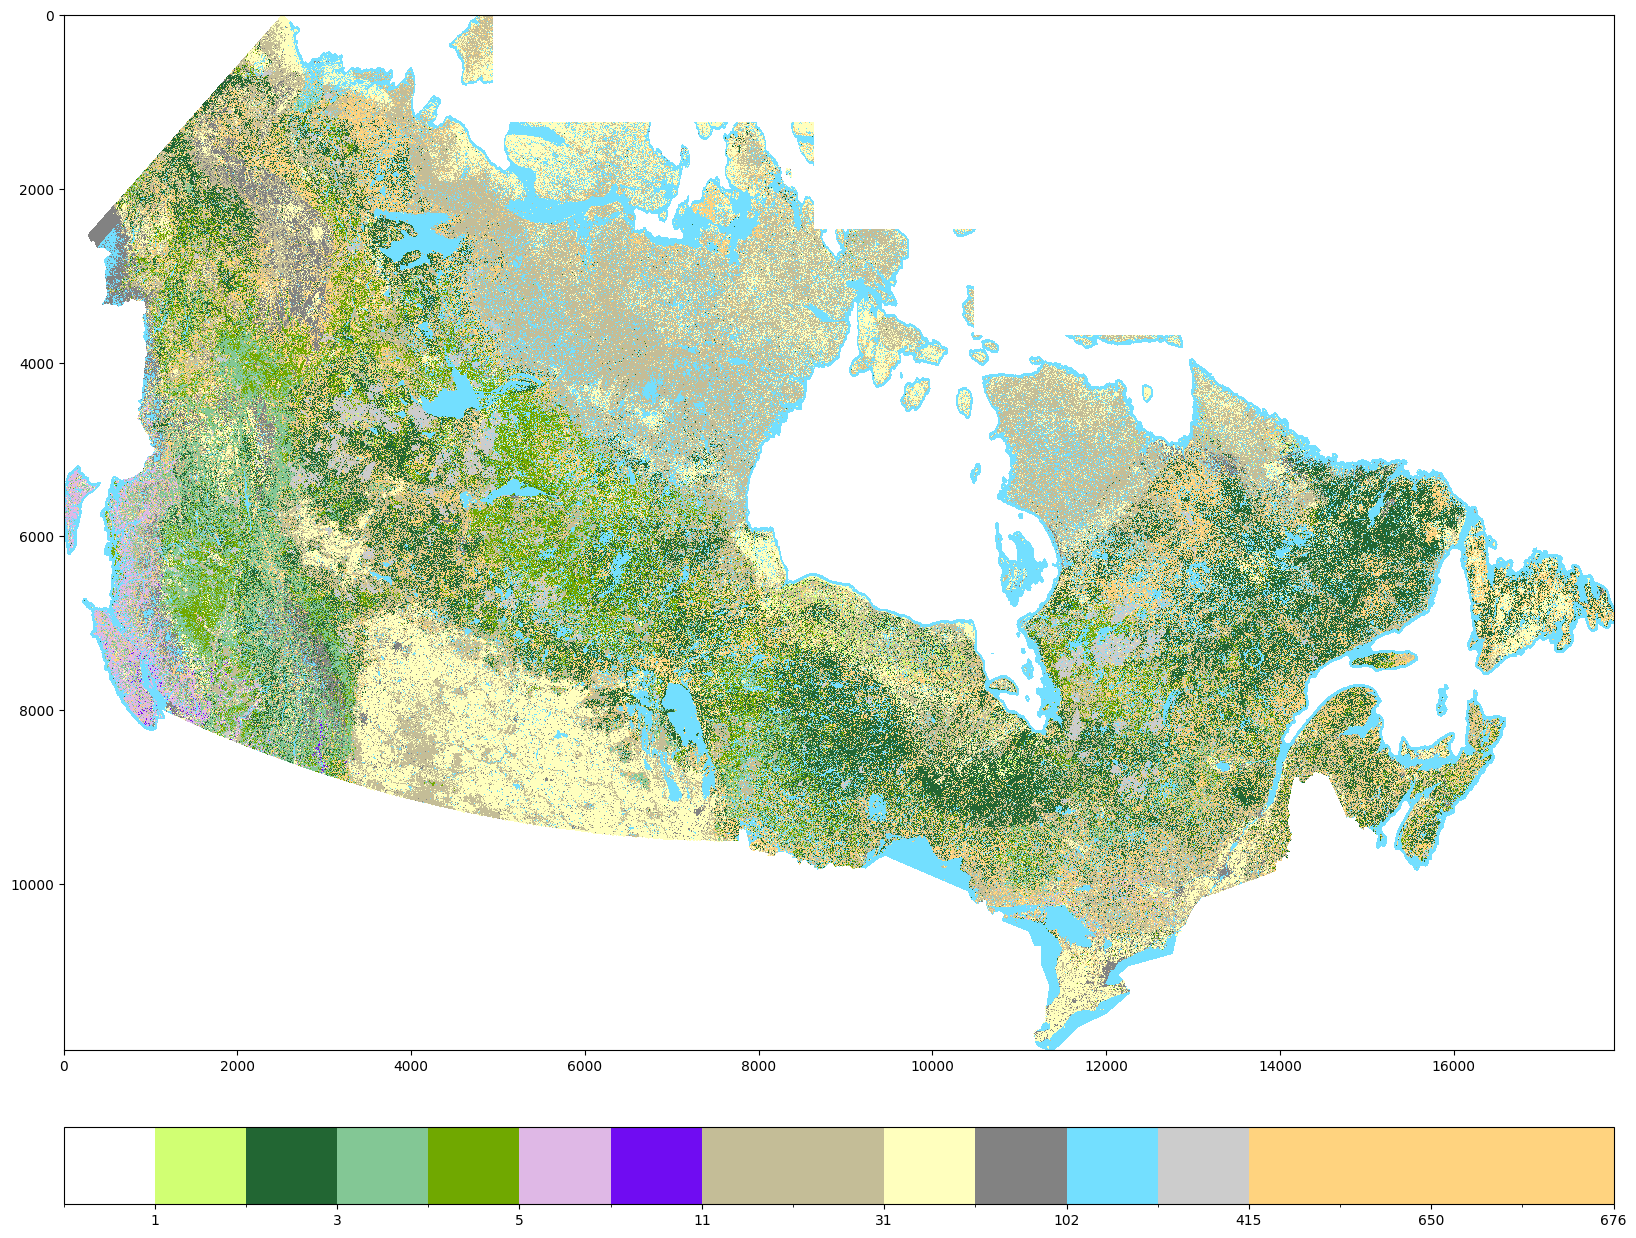

In [6]:
fig, ax = plt.subplots(
    figsize = (20,20)
)


plt.imshow(
    image_data[::SAMPLE_SIZE, ::SAMPLE_SIZE], 
    cmap=cmap, 
    norm=norm, 
    interpolation="nearest"
)

plt.colorbar(
    orientation='horizontal',
    pad=0.05
)


In [7]:
unique_values, counts = np.unique(
    image_data, 
    return_counts=True
)

In [8]:
unique_values, counts

(array([-9999,     1,     2,     3,     4,     5,     7,    11,    13,
           31,   101,   102,   105,   415,   625,   650,   675],
       dtype=int16),
 array([11265389120,    36989074,  1526805857,   551266748,   604322314,
          101926131,     4306020,   467712760,  1861696070,  1324525008,
          288352149,  1713377413,   155636827,    70421805,   537200642,
          310202152,   427012411]))